# Using XGBoost to generate prediction models and find relevant features
This notebook uses the XGBoost algorithm in combination with the SHAP library in attempt to generate accurate predictions and to find useful features to reduce dimensionality for our downstream models.

### This class will handle the OHLCV pandas dataframe+indicators, create a prediction df, normalize, and optionally plot residuals and/or feature importances  
 

In [117]:
import sys
sys.path.append('../../scripts')

In [119]:
from xgboost_for_tickers import TickerXGBClassifier

## Analysis: Feature Importance  


### Example using MSFT data:

In [120]:
def preprocess(data):
    # keep feature data only
    data = data.iloc[:, 7:]
    data.columns = [c.lower() for c in data.columns]
    return data

ticker = 'MSFT'
df = pd.read_csv(f'../../data/ticker_data/{ticker}_full_data.csv')
df= preprocess(df)

normilization_type: return 
target: close 1 day shifted
SCORE=ACCURACY. START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'binary:logistic'}...
Test Score: 0.5128676470588235
Train Score: 0.546896551724138

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300, 'objective': 'binary:logistic'}...
Test Score: 0.5367647058823529
Train Score: 0.5542528735632184

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'binary:logistic'}...
Test Score: 0.5477941176470589
Train Score: 0.5627586206896552

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'objective': 'binary:logistic'}...
Test Score: 0.5569852941176471
Train Score: 0.5889655172413794

Testing {'colsample_bytree': 0.7

Test Score: 0.5459558823529411
Train Score: 0.5898850574712644

Testing {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300, 'objective': 'binary:logistic'}...
Test Score: 0.5477941176470589
Train Score: 0.6018390804597701

Testing {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'binary:logistic'}...
Test Score: 0.46691176470588236
Train Score: 0.6181609195402299

Testing {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic'}...
Test Score: 0.4577205882352941
Train Score: 0.6395402298850574

Testing {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'objective': 'binary:logistic'}...
Test Score: 0.46139705882352944
Train Score: 0.6641379310344827

Testing {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'bina

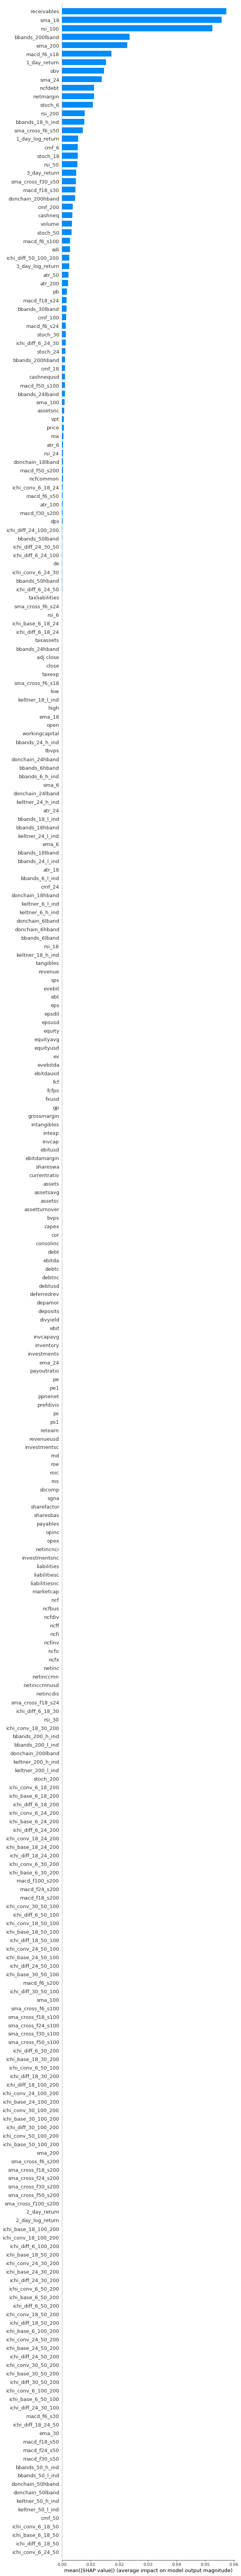

In [121]:
modler = TickerXGBClassifier(df.copy())
modler.predict_with_xgb(target='close', gsearch_params={
    'max_depth': [1,2,3], 'learning_rate': [0.01, 0.005], 'colsample_bytree': [0.75, 1], 
    'n_estimators': [200, 300,500], 'objective': ['binary:logistic'], 'gamma':[0, 0.1]},
    normilization_type='return', test_size=0.2, timeframe=-1)

In [122]:
modler.test_data['close-1_return'].value_counts()

1    608
0    481
Name: close-1_return, dtype: int64

In [123]:
608 / (481+608)

0.5583103764921947

Model is worse than just predicting a "1" (increase) every time for combined test + final holdout